## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [45]:
import pandas as pd
import numpy as np

In [46]:
import pymongo

client = pymongo.MongoClient("192.168.10.240", 27017)
db = client['AI_LKJ']
collection_data_tour_pass_visitor = db['data_tour_pass_visitor']

data_tour_pass_visitor = collection_data_tour_pass_visitor.find()
df_tourpass_visitor = pd.DataFrame(data_tour_pass_visitor)

In [47]:
df_tourpass_visitor

,_id,date,visitor,region
0,663dbde82581fd20a9efc69a,201903,61439672,경기
1,663dbde82581fd20a9efc69b,201904,45141490,경기
2,663dbde82581fd20a9efc69c,201905,53300448,경기
3,663dbde82581fd20a9efc69d,201906,54278542,경기
4,663dbde82581fd20a9efc69e,201907,60857158,경기
...,...,...,...,...
235,663dbde82581fd20a9efc785,202310,5614039,제주
236,663dbde82581fd20a9efc786,202311,4672499,제주
237,663dbde82581fd20a9efc787,202312,4638646,제주
238,663dbde82581fd20a9efc788,202401,5195183,제주


In [48]:
df_tourpass_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      240 non-null    object
 1   date     240 non-null    int64 
 2   visitor  240 non-null    int64 
 3   region   240 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.6+ KB


In [50]:
df_tourpass_visitor['date'] = pd.to_datetime(df_tourpass_visitor['date'], format="%Y%m")
df_tourpass_visitor['date_year'] = df_tourpass_visitor['date'].dt.year
df_tourpass_visitor['date_month'] = df_tourpass_visitor['date'].dt.month

In [51]:
df_tourpass_visitor

,_id,date,visitor,region,date_year,date_month
0,663dbde82581fd20a9efc69a,2019-03-01,61439672,경기,2019,3
1,663dbde82581fd20a9efc69b,2019-04-01,45141490,경기,2019,4
2,663dbde82581fd20a9efc69c,2019-05-01,53300448,경기,2019,5
3,663dbde82581fd20a9efc69d,2019-06-01,54278542,경기,2019,6
4,663dbde82581fd20a9efc69e,2019-07-01,60857158,경기,2019,7
...,...,...,...,...,...,...
235,663dbde82581fd20a9efc785,2023-10-01,5614039,제주,2023,10
236,663dbde82581fd20a9efc786,2023-11-01,4672499,제주,2023,11
237,663dbde82581fd20a9efc787,2023-12-01,4638646,제주,2023,12
238,663dbde82581fd20a9efc788,2024-01-01,5195183,제주,2024,1


## ??

- 투어패스가 등장한 시점
- 제주 : 2021년 3월
- 부산 : 2022년 2월
- 강원 : 2023년 7월
- 경기 : 2023년 7월

In [17]:
df_tourpass_visitor

,_id,date,visitor,region
0,663dbde82581fd20a9efc69a,2019-03-01,61439672,경기
1,663dbde82581fd20a9efc69b,2019-04-01,45141490,경기
2,663dbde82581fd20a9efc69c,2019-05-01,53300448,경기
3,663dbde82581fd20a9efc69d,2019-06-01,54278542,경기
4,663dbde82581fd20a9efc69e,2019-07-01,60857158,경기
...,...,...,...,...
235,663dbde82581fd20a9efc785,2023-10-01,5614039,제주
236,663dbde82581fd20a9efc786,2023-11-01,4672499,제주
237,663dbde82581fd20a9efc787,2023-12-01,4638646,제주
238,663dbde82581fd20a9efc788,2024-01-01,5195183,제주


In [9]:
grouped = df_tourpass_visitor.query("region == '제주'")
highlight_date = pd.to_datetime('2021-03-01')
highlight_data = grouped[grouped['date'] == highlight_date]

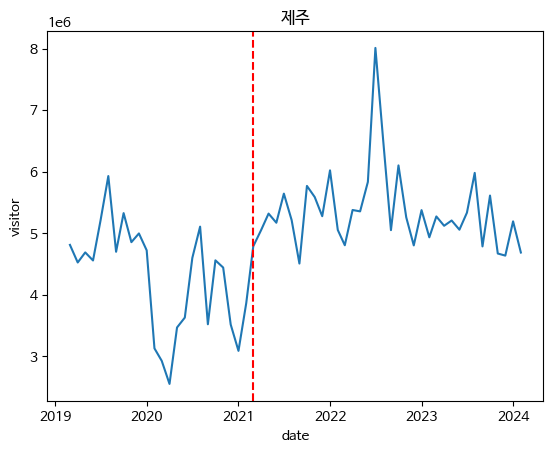

In [10]:
plt.title("제주")

sns.lineplot(data=grouped, x='date', y='visitor')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [11]:
grouped = df_tourpass_visitor.query("region == '부산'")
highlight_date = pd.to_datetime('2022-02-01')
highlight_data = grouped[grouped['date'] == highlight_date]

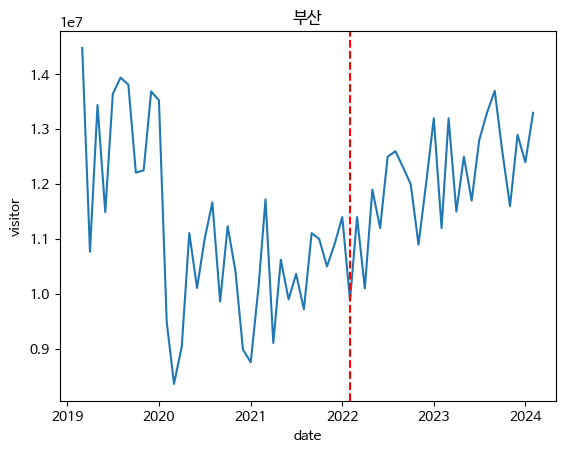

In [12]:
plt.title("부산")

sns.lineplot(data=grouped, x='date', y='visitor')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [13]:
grouped = df_tourpass_visitor.query("region == '강원'")
highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

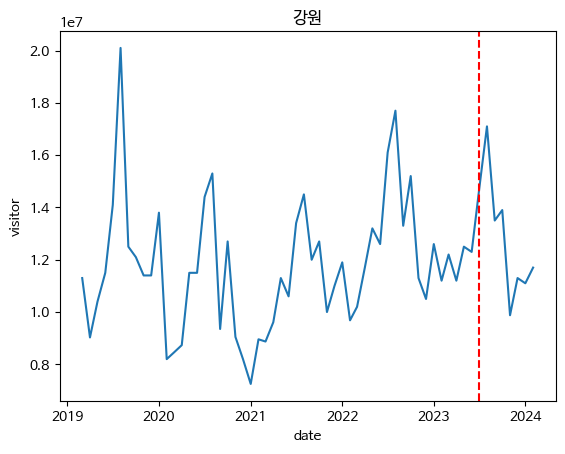

In [14]:
plt.title("강원")

sns.lineplot(data=grouped, x='date', y='visitor')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [15]:
grouped = df_tourpass_visitor.query("region == '경기'")
highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

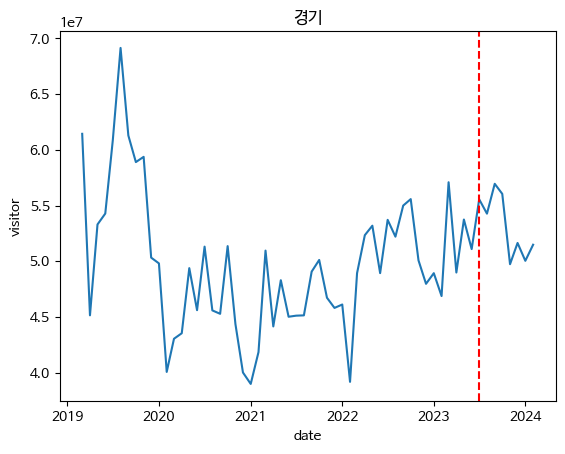

In [16]:
plt.title("경기")

sns.lineplot(data=grouped, x='date', y='visitor')
plt.axvline(x=highlight_date, color='red', linestyle='--')

- 경기 : 23년 11월 15일 까지기간 한정으로 진행
- 그래서 저 기간에 해당하는 관광지 방문자 수가 증가했는지 봐도 괜찮을거같아여